In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,937 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import os
os.chdir("/content/drive/MyDrive//금융데이터 공모전")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_excel("머신러닝을 위한 학습자료(월을 기준으로 합쳐서 숫자화).xlsx")
df=df.iloc[:,:-5]

In [ ]:
df=df.drop(columns='품목대분류코드')

In [ ]:
df

,기준년월,품목중분류코드,성별,연령,가구생애주기,시군구,법정동코드,매출금액,매출건수
0,201903,1010,0,40.0,3,구로구,11530109.0,782521,13
1,201903,2110,0,20.0,2,구로구,11530109.0,963789,29
2,201903,1913,0,30.0,2,구로구,11530109.0,924309,46
3,201903,2111,0,30.0,2,구로구,11530109.0,1089360,54
4,201903,1710,0,30.0,2,구로구,11530109.0,1656740,58
...,...,...,...,...,...,...,...,...,...
306117,202103,2013,0,30.0,1,영등포구,11560108.0,1411368,7
306118,202103,2110,1,30.0,1,영등포구,11560108.0,1386040,63
306119,202103,1113,0,30.0,2,영등포구,11560108.0,390818,7
306120,202103,1610,1,40.0,3,영등포구,11560108.0,327592,7


In [ ]:
pattern=df.drop(columns=['매출금액'])

In [ ]:
pattern = df[['매출건수']].groupby([df['기준년월'],df['성별'],df['연령'],df['가구생애주기'],df['법정동코드'], df['품목중분류코드']]).sum()
pattern.to_csv("Gpattern(구매패턴분석, 품목으로 묶어서 매출건수합).csv")

In [ ]:
pattern= pd.read_csv("Gpattern(구매패턴분석, 품목으로 묶어서 매출건수합).csv")
pattern

,기준년월,성별,연령,가구생애주기,법정동코드,품목중분류코드,매출건수
0,201903,0,18.0,1,11140162.0,2110,67
1,201903,0,18.0,1,11215101.0,2110,29
2,201903,0,18.0,1,11230109.0,2110,13
3,201903,0,18.0,1,11260101.0,2110,33
4,201903,0,18.0,1,11290139.0,2110,25
...,...,...,...,...,...,...,...
305350,202103,1,60.9,5,11740110.0,1611,30
305351,202103,1,60.9,5,11740110.0,1612,7
305352,202103,1,60.9,5,11740110.0,1710,16
305353,202103,1,60.9,5,11740110.0,1810,10


In [ ]:
pattern=pd.get_dummies(data=pattern, columns=['품목중분류코드'], prefix=['중분류코드'])
pattern

,기준년월,성별,연령,가구생애주기,법정동코드,매출건수,중분류코드_1010,중분류코드_1011,중분류코드_1012,중분류코드_1013,중분류코드_1014,중분류코드_1110,중분류코드_1111,중분류코드_1112,중분류코드_1113,중분류코드_1114,중분류코드_1210,중분류코드_1211,중분류코드_1212,중분류코드_1213,중분류코드_1214,중분류코드_1215,중분류코드_1310,중분류코드_1311,중분류코드_1312,중분류코드_1313,중분류코드_1314,중분류코드_1410,중분류코드_1411,중분류코드_1412,중분류코드_1510,중분류코드_1511,중분류코드_1610,중분류코드_1611,중분류코드_1612,중분류코드_1710,중분류코드_1711,중분류코드_1712,중분류코드_1810,중분류코드_1812,중분류코드_1910,중분류코드_1911,중분류코드_1912,중분류코드_1913,중분류코드_2010,중분류코드_2011,중분류코드_2012,중분류코드_2013,중분류코드_2014,중분류코드_2110,중분류코드_2111,중분류코드_2112,중분류코드_9910,중분류코드_9911,중분류코드_9912,중분류코드_9913
0,201903,0,18.0,1,11140162.0,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,201903,0,18.0,1,11215101.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,201903,0,18.0,1,11230109.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,201903,0,18.0,1,11260101.0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,201903,0,18.0,1,11290139.0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305350,202103,1,60.9,5,11740110.0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
305351,202103,1,60.9,5,11740110.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
305352,202103,1,60.9,5,11740110.0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
305353,202103,1,60.9,5,11740110.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1. 가구형태 예측하기

In [ ]:
X1=pattern.iloc[:,0:3]
X2=pattern.iloc[:,4:56]
X=pd.concat([X1,X2],axis=1)
X=pd.get_dummies(data=X, columns=['법정동코드'], prefix=['법정동코드'])
y=pattern.iloc[:,[3]]

In [ ]:
X

,기준년월,성별,연령,매출건수,중분류코드_1010,중분류코드_1011,중분류코드_1012,중분류코드_1013,중분류코드_1014,중분류코드_1110,중분류코드_1111,중분류코드_1112,중분류코드_1113,중분류코드_1114,중분류코드_1210,중분류코드_1211,중분류코드_1212,중분류코드_1213,중분류코드_1214,중분류코드_1215,중분류코드_1310,중분류코드_1311,중분류코드_1312,중분류코드_1313,중분류코드_1314,중분류코드_1410,중분류코드_1411,중분류코드_1412,중분류코드_1510,중분류코드_1511,중분류코드_1610,중분류코드_1611,중분류코드_1612,중분류코드_1710,중분류코드_1711,중분류코드_1712,중분류코드_1810,중분류코드_1812,중분류코드_1910,중분류코드_1911,...,법정동코드_11650108.0,법정동코드_11650109.0,법정동코드_11650110.0,법정동코드_11650111.0,법정동코드_11680101.0,법정동코드_11680103.0,법정동코드_11680104.0,법정동코드_11680105.0,법정동코드_11680106.0,법정동코드_11680107.0,법정동코드_11680108.0,법정동코드_11680110.0,법정동코드_11680111.0,법정동코드_11680112.0,법정동코드_11680113.0,법정동코드_11680114.0,법정동코드_11680115.0,법정동코드_11680118.0,법정동코드_11710101.0,법정동코드_11710102.0,법정동코드_11710103.0,법정동코드_11710104.0,법정동코드_11710105.0,법정동코드_11710106.0,법정동코드_11710107.0,법정동코드_11710108.0,법정동코드_11710109.0,법정동코드_11710111.0,법정동코드_11710112.0,법정동코드_11710113.0,법정동코드_11710114.0,법정동코드_11740101.0,법정동코드_11740102.0,법정동코드_11740103.0,법정동코드_11740105.0,법정동코드_11740106.0,법정동코드_11740107.0,법정동코드_11740108.0,법정동코드_11740109.0,법정동코드_11740110.0
0,201903,0,18.0,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,201903,0,18.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,201903,0,18.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,201903,0,18.0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,201903,0,18.0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305350,202103,1,60.9,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
305351,202103,1,60.9,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
305352,202103,1,60.9,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
305353,202103,1,60.9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y

,가구생애주기
0,1
1,1
2,1
3,1
4,1
...,...
305350,5
305351,5
305352,5
305353,5


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
featureImportance

In [ ]:
##상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
xgbc = XGBClassifier(max_depth=7, n_estimators=50, colsample_bytree=0.5, learning_rate=0.1,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
##상위 10개 중요한 피처
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(10,10))
plot_importance(xgbc, ax=ax, max_num_features=10, height=0.5)
plt.yticks(fontproperties='NanumBarunGothic', fontsize=15) 
plt.title('Feature importance',fontsize=20)

2. 여성의류 예측

In [ ]:
pattern

,기준년월,성별,연령,가구생애주기,시군구,법정동코드,중분류코드_1010,중분류코드_1011,중분류코드_1012,중분류코드_1013,중분류코드_1014,중분류코드_1110,중분류코드_1111,중분류코드_1112,중분류코드_1113,중분류코드_1114,중분류코드_1210,중분류코드_1211,중분류코드_1212,중분류코드_1213,중분류코드_1214,중분류코드_1215,중분류코드_1310,중분류코드_1311,중분류코드_1312,중분류코드_1313,중분류코드_1314,중분류코드_1410,중분류코드_1411,중분류코드_1412,중분류코드_1510,중분류코드_1511,중분류코드_1610,중분류코드_1611,중분류코드_1612,중분류코드_1710,중분류코드_1711,중분류코드_1712,중분류코드_1810,중분류코드_1812,중분류코드_1910,중분류코드_1911,중분류코드_1912,중분류코드_1913,중분류코드_2010,중분류코드_2011,중분류코드_2012,중분류코드_2013,중분류코드_2014,중분류코드_2110,중분류코드_2111,중분류코드_2112,중분류코드_9910,중분류코드_9911,중분류코드_9912,중분류코드_9913
0,201903,0,40.0,3,구로구,11530109.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,201903,0,20.0,2,구로구,11530109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,201903,0,30.0,2,구로구,11530109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,201903,0,30.0,2,구로구,11530109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,201903,0,30.0,2,구로구,11530109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,202103,0,30.0,1,영등포구,11560108.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
306118,202103,1,30.0,1,영등포구,11560108.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
306119,202103,0,30.0,2,영등포구,11560108.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,202103,1,40.0,3,영등포구,11560108.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1=pattern.iloc[:,0:6]
X2=pattern.iloc[:,7:56]
X=pd.concat([X1,X2],axis=1)
X=pd.get_dummies(data=X, columns=['법정동코드'], prefix=['법정동코드'])
X=X.drop(columns=['시군구'])
y=pattern.iloc[:,[6]]

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


0.4.3
Class=1, n=7137 (2.331%)
Class=0, n=298985 (97.669%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


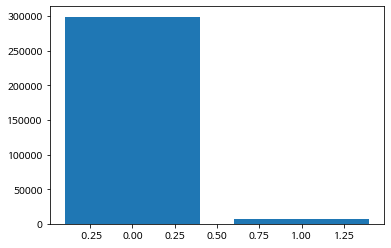

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
count_and_plot(y.to_numpy().ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
##1의 precision이 지나치게 낮다. 왜냐하면 임산부용품을 산 사람들의 샘플데이터가 적기 때문에 안 사람이 훨씬 많아서 기ㅖ가 계속 No를 외침
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     61550
           1       0.00      0.00      0.00      1491

    accuracy                           0.97     63041
   macro avg       0.49      0.50      0.49     63041
weighted avg       0.95      0.97      0.96     63041



### 그렇기 때문에 이러한 weight unbalance 문제를 undersampling과 oversampling으로 해결하고자 한다

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=7137 (50.000%)
Class=1, n=7137 (50.000%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


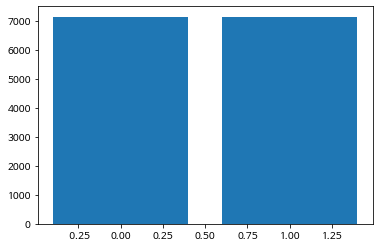

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
X_resample, y_resample= RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1408

    accuracy                           1.00      2855
   macro avg       1.00      1.00      1.00      2855
weighted avg       1.00      1.00      1.00      2855



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
featureImportance

array([1.31214235e-02, 2.26641148e-02, 9.27715869e-03, 8.80706317e-03,
       1.18710479e-02, 2.21042302e-02, 3.74091194e-03, 2.30355611e-02,
       1.35989532e-02, 2.46391012e-02, 1.17993340e-02, 1.30897885e-02,
       2.20434101e-02, 2.59350380e-02, 1.44852357e-02, 2.66615110e-02,
       1.28038283e-03, 5.15498900e-03, 8.79500716e-03, 2.01017129e-03,
       8.55966515e-03, 3.27808218e-03, 9.00742926e-03, 9.84086246e-03,
       1.99021093e-02, 1.10094084e-02, 6.68041899e-03, 2.23298954e-02,
       2.99722458e-02, 3.97047175e-02, 3.67946072e-02, 3.31722134e-02,
       3.93127047e-02, 1.13771547e-02, 1.16944960e-02, 3.30547251e-02,
       5.15446253e-03, 1.20654009e-02, 2.76620033e-02, 2.06300599e-02,
       2.57676222e-02, 2.39792102e-02, 8.83740895e-03, 1.69233250e-02,
       2.86099910e-02, 3.79467865e-02, 6.23127346e-02, 3.08279495e-02,
       1.96565443e-02, 9.69930596e-04, 1.94834629e-02, 4.34954830e-03,
       1.64378840e-03, 3.90053135e-05, 0.00000000e+00, 0.00000000e+00,
      

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


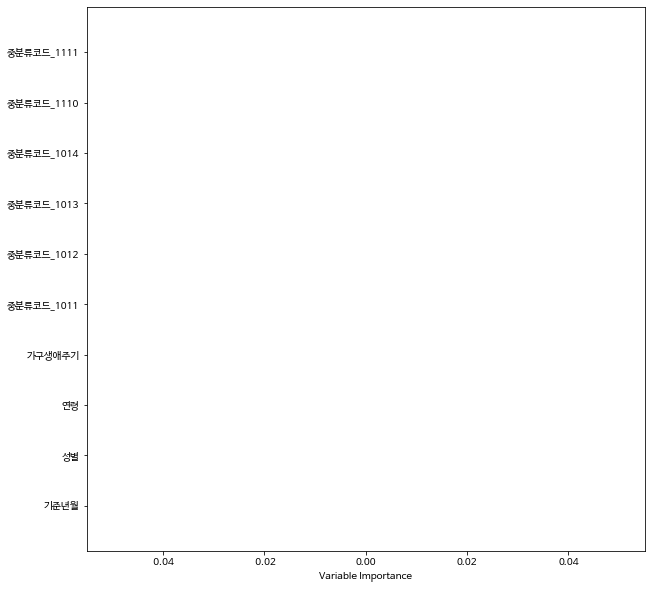

In [ ]:
##상위 10개 중요도
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import pylab as plot
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)[:10]

barPos = np.arange(sorted_idx.shape[0])+.5
barPos=barPos[:10]
plt.subplots(figsize=(10,10))
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos,X.columns) #wineNa[sorted_idx]
plot.xlabel('Variable Importance')
plot.show()

### oversampling 방법으로 <시간은 8분정도로 오래걸리지만 성능은 undersample하는 것 보다 훨씬 좋음>

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=1, n=298985 (50.000%)
Class=0, n=298985 (50.000%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


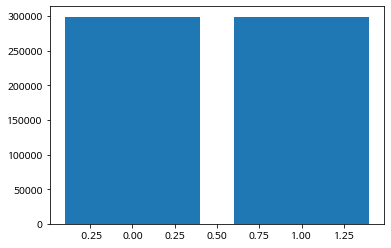

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.over_sampling import RandomOverSampler
X_resample, y_resample= RandomOverSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59858
           1       1.00      1.00      1.00     59736

    accuracy                           1.00    119594
   macro avg       1.00      1.00      1.00    119594
weighted avg       1.00      1.00      1.00    119594



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
featureImportance

array([1.68913814e-03, 2.23585120e-02, 2.45676123e-03, 1.64536908e-03,
       1.46621286e-02, 1.93741073e-02, 5.13213338e-03, 2.56009525e-02,
       1.41608451e-02, 2.56644204e-02, 1.42199296e-02, 1.40740257e-02,
       2.15081268e-02, 2.62096804e-02, 1.54623121e-02, 2.39528701e-02,
       1.39837319e-03, 5.13654856e-03, 7.30947358e-03, 3.11639194e-03,
       1.08116673e-02, 4.24270813e-03, 8.62595206e-03, 6.96272534e-03,
       2.20550900e-02, 1.29757433e-02, 7.15371328e-03, 2.45533282e-02,
       3.65035534e-02, 3.65202418e-02, 3.79205231e-02, 3.57528589e-02,
       4.04421485e-02, 1.35791238e-02, 1.80130876e-02, 3.33707014e-02,
       6.28830825e-03, 1.47726625e-02, 2.78727248e-02, 2.16677504e-02,
       2.66857016e-02, 2.09215672e-02, 1.35477661e-02, 2.01630256e-02,
       3.41625647e-02, 3.59803795e-02, 6.33304271e-02, 3.64112011e-02,
       2.74510140e-02, 1.19957003e-03, 1.98827205e-02, 4.11982198e-03,
       1.48191535e-03, 2.51098720e-06, 2.63615621e-05, 1.23697596e-07,
      

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


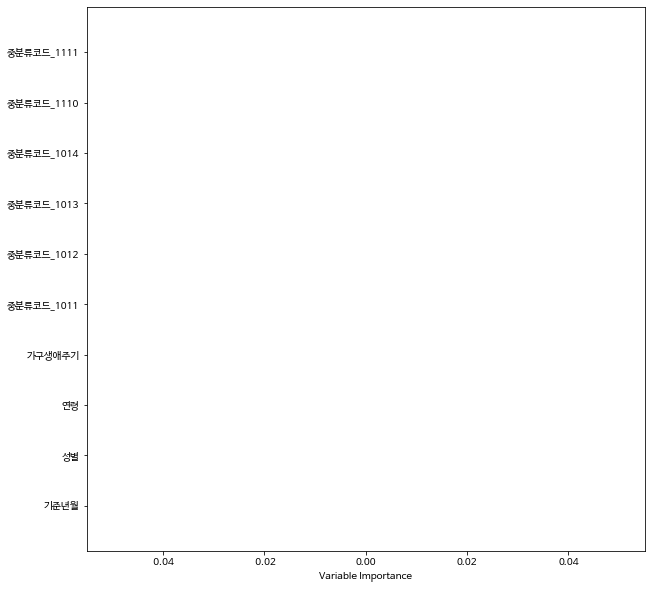

In [ ]:
##상위 10개 중요도
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import pylab as plot
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)[:10]

barPos = np.arange(sorted_idx.shape[0])+.5
barPos=barPos[:10]
plt.subplots(figsize=(10,10))
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos,X.columns) #wineNa[sorted_idx]
plot.xlabel('Variable Importance')
plot.show()

### 결론: ##이것이 한 열이 그냥 1 000000 되어 있기 때문에 나머지가 다 0이면 1로 예측하는 것 같아서 원래 하려고 했던 거의 유효성은 없을 듯